In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools 
import plotly.graph_objects as go
from scipy import stats
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from plotly.subplots import make_subplots
from plotly import tools 
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm 
from sklearn.linear_model import LassoCV
from collections import Counter

In [2]:
df_original = pd.read_csv('cc.csv', index_col='CUST_ID')
df = df_original.copy()

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step1: Exploratory Data Analysis – 10p
### a)	Explain the shape of the dataset (restriction of at least 10 columns, 1000 rows)


In [4]:
df.shape

(8950, 17)

### b)	Explain the column types in the dataset

In [5]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

CUSTID : Kredi kartı id  <br> 
BALANCE :Satın alma için kalan bakiye tutarı <br> 
BALANCEFREQUENCY : Bakiyenin hangi sıklıkla güncellendiği 0-1 arası değer (1 = sıklıkla, 0 = )<br> 
PURCHASES :Hesaptan yapılan satın alma tutarı<br> 
ONEOFFPURCHASES : Tek seferde yapılan maksimum satın alma tutarı<br> 
INSTALLMENTSPURCHASES : Taksitle yapılan satın alma tutarı<br> 
CASHADVANCE : Kullanıcının verdiği peşin nakit<br> 
PURCHASESFREQUENCY : Hangi sıklıkla satı alma yapıldığı 0 1 arası değer (1 = sıklıkla, 0)<br> 
ONEOFFPURCHASESFREQUENCY : Hangi sıklıkla tek seferde alım yapıldığı 0-1 arası değer (1 = sıklıkla, 0 =)<br> 
PURCHASESINSTALLMENTSFREQUENCY : Hangi sıklıkla taksitle alım yapıldığı 0-1 arası değer (1 = sıklıkla, 0 = )<br> 
CASHADVANCEFREQUENCY : Nakit peşin ödeme sıklığı<br> 
CASHADVANCETRX : Nakit avans ile yapılan işlem sayısı<br> 
PURCHASESTRX : Satın alma işlem sayısı<br> 
CREDITLIMIT :Kredi kartı limiti<br> 
PAYMENTS : Kullanıcının ödeme tutarı<br> 
MINIMUM_PAYMENTS : Minimum ödeme tutarı<br> 
PRCFULLPAYMENT :Tam ödemenin yüzdesi<br> 
TENURE : Kredi kartı hizmet süresi<br> 

### c)	Explain the distribution of only 2 features in your dataset (one numeric, one categorical) using visualizations

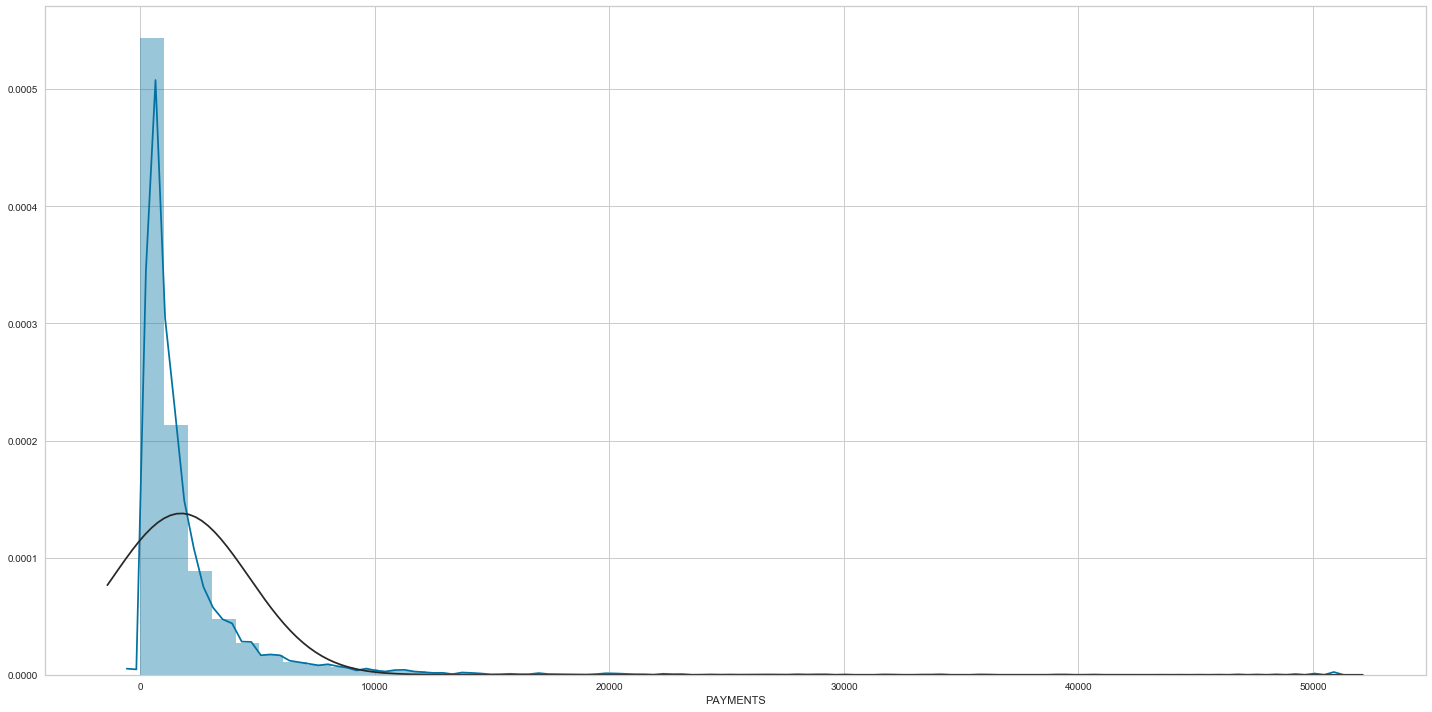

In [6]:
plt.figure(figsize=(20,10))
sns.distplot(df['PAYMENTS'].dropna(),fit=norm)
plt.tight_layout()

In [7]:
df.iplot(asFigure=True, x='TENURE', y='PAYMENTS', mode='markers')

# Step2: Preprocessing – 10p
### a)	How many columns include missing values


In [8]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Nulls'])
NAs[NAs.sum(axis=1) > 0]

,Nulls
CREDIT_LIMIT,1
MINIMUM_PAYMENTS,313


### b)	Explain your method to handle each of those missing values

In [9]:
num_attributes = df.select_dtypes(include='float64')
for i in num_attributes:
    df[i] = df[i].fillna(df[i].mean())

In [10]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Nulls'])
NAs[NAs.sum(axis=1) > 0]

,Nulls


### c)	Explain if you needed to apply any kind of transformations.

In [11]:
df_scaled = StandardScaler().fit_transform(df)
df_nor = normalize(df_scaled) 

# Step3: Clustering evaluation – 15p
### a)	Select 3 clustering evaluation methods that you will use in your project, and explain them in detail by giving proper formulation.


### b)	Show example visualizations associated with your selected method.

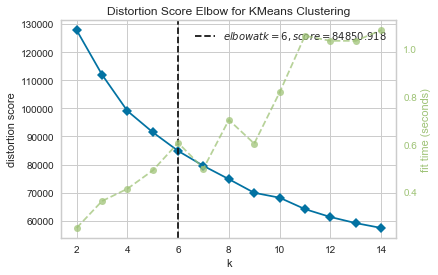

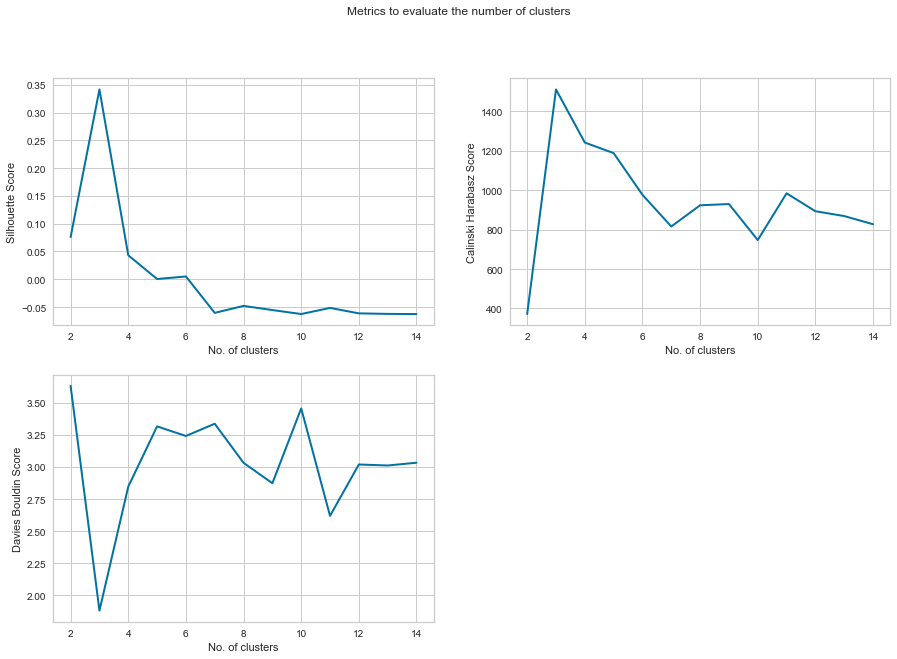

In [12]:
silhouette = []
ch_score = []
db_score = []
min_clust = 2
max_clust = 15 
rand_state = 42
for n_clust in range(min_clust, max_clust):
    kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
    y_label = kmeans.fit_predict(df_scaled)
    silhouette.append(silhouette_score(df, y_label))
    ch_score.append(calinski_harabasz_score(df, y_label))
    db_score.append(davies_bouldin_score(df, y_label))        

visualizer = KElbowVisualizer(kmeans, k=(min_clust,max_clust))
visualizer.fit(df_scaled)   
visualizer.poof()  
    
fig, ax = plt.subplots(2, 2, figsize=(15, 10))   
ax[0][0].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
ax[0][0].set_xlabel('No. of clusters')
ax[0][0].set_ylabel('Silhouette Score')
    
ax[0][1].plot(range(min_clust, max_clust), ch_score, '-x', linewidth=2)
ax[0][1].set_xlabel('No. of clusters')
ax[0][1].set_ylabel('Calinski Harabasz Score')
    
ax[1][0].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
ax[1][0].set_xlabel('No. of clusters')
ax[1][0].set_ylabel('Davies Bouldin Score')
    
ax[-1, -1].axis('off')
fig.suptitle('Metrics to evaluate the number of clusters')
plt.show()

# Step4: Clustering algorithms, Implementation and Performance Comparison – 45p
### a)	Select 1clustering algorithm from each of the following three categories: Partitioning methods, Hierarchical methods and Density-based methods.


In [13]:
kmeans      = KMeans(random_state=42).fit_predict(df_scaled)
agglomerative = AgglomerativeClustering().fit_predict(df_scaled)
dbscan       = DBSCAN().fit_predict(df_scaled)

In [14]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_scaled, kmeans, metric='euclidean')
agglomerative_Silhouette_Score = metrics.silhouette_score(df_scaled, agglomerative, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_scaled, dbscan, metric='euclidean')

In [15]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],
                                ['Agglomerative',agglomerative_Silhouette_Score ],
                                ['DBSCAN', DBSCAN_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.218552
1,Agglomerative,0.177545
2,DBSCAN,-0.443701


In [129]:
pca = PCA(n_components=2).fit(df_scaled)

df_pca2 = pca.fit_transform(df_scaled)
print("original shape:   ", df_scaled.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [130]:
df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

,A1,A2
0,-1.682220,-1.076456
1,-1.138289,2.506438
2,0.969684,-0.383520
3,-0.873634,0.043189
4,-1.599431,-0.688592


### b)	Give brief definition of each of three methods along with the parameters need to be tuned.

### KMEANS PARAMETER TUNING

In [131]:
km_default = KMeans(random_state = 42).fit(df_scaled)
silhouette_score(df_scaled, km_default.labels_)

0.21855245589945793

In [132]:
km_default_df = pd.concat([df_pca, pd.DataFrame({'cluster':km_default.labels_})], axis = 1)
km_default_df.head()

,A1,A2,cluster
0,-1.682220,-1.076456,3
1,-1.138289,2.506438,2
2,0.969684,-0.383520,7
3,-0.873634,0.043189,3
4,-1.599431,-0.688592,3


In [135]:
list(set(km_default.labels_))

[0, 1, 2, 3, 4, 5, 6, 7]

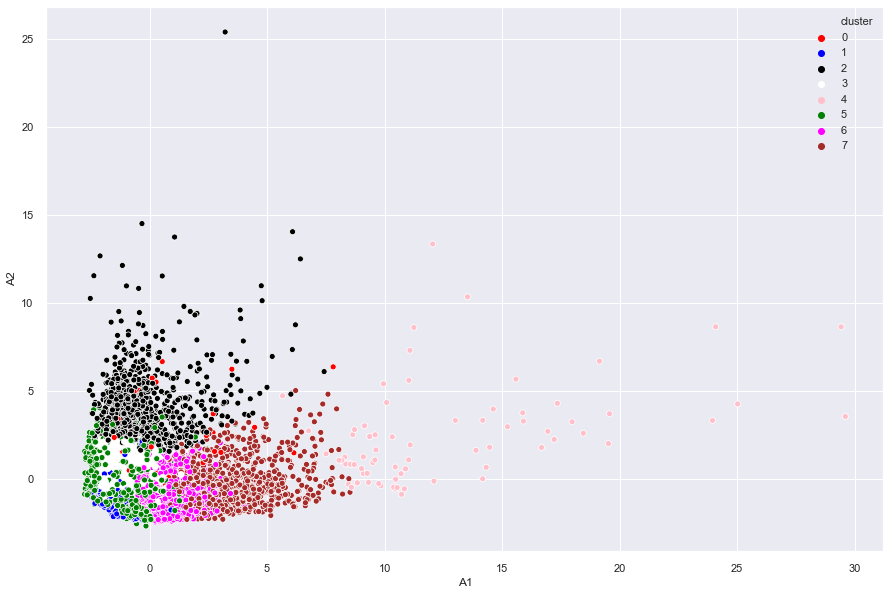

In [139]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=km_default_df,palette=['red','blue', 'black','white','pink','green','magenta','brown'])
plt.show()

In [17]:
from itertools import product

init_values = ['random', 'k-means++']
algorithm_params= ['auto', 'full', 'elkan']
cluster_values = np.arange(2,15)
kmeans_params = list(product(init_values, algorithm_params, cluster_values))

In [25]:
km_scores = []
for k in kmeans_params:
    km_clustering = KMeans(init=k[0], algorithm=k[1], n_clusters= k[2], random_state = 42).fit(df_scaled)
    km_scores.append(silhouette_score(df_scaled, km_clustering.labels_))
    print('score', silhouette_score(df_scaled, km_clustering.labels_))
    print('init: ', k[0], ' algorithm: ', k[1], ' cluster: ', k[2])
    print('--------------')

score 0.20950134853896507
init:  random  algorithm:  auto  cluster:  2
--------------
score 0.250199078223706
init:  random  algorithm:  auto  cluster:  3
--------------
score 0.1976074492720698
init:  random  algorithm:  auto  cluster:  4
--------------
score 0.19316885901546374
init:  random  algorithm:  auto  cluster:  5
--------------
score 0.20268677041903732
init:  random  algorithm:  auto  cluster:  6
--------------
score 0.21522963769382036
init:  random  algorithm:  auto  cluster:  7
--------------
score 0.20853465664037898
init:  random  algorithm:  auto  cluster:  8
--------------
score 0.2151969872113643
init:  random  algorithm:  auto  cluster:  9
--------------
score 0.21999820888718213
init:  random  algorithm:  auto  cluster:  10
--------------
score 0.21940644909211196
init:  random  algorithm:  auto  cluster:  11
--------------
score 0.2165881952699648
init:  random  algorithm:  auto  cluster:  12
--------------
score 0.21585036885042108
init:  random  algorithm:  aut

In [26]:
max(km_scores)

0.25178745934850205

In [27]:
km_best_params= KMeans(init="random", algorithm="full", n_clusters= 3, random_state = 42).fit(df_scaled)
silhouette_score(df_scaled, km_best_params.labels_)

0.25178745934850205

In [107]:
km_score_best_params = silhouette_score(df_scaled, km_best_params.labels_)

In [123]:
km_df = pd.concat([df_pca, pd.DataFrame({'cluster':km_best_params.labels_})], axis = 1)
km_df.head()

,A1,A2,cluster
0,-1.682221,-1.076455,0
1,-1.138296,2.506432,2
2,0.969688,-0.383500,0
3,-0.873631,0.043135,0
4,-1.599433,-0.688570,0


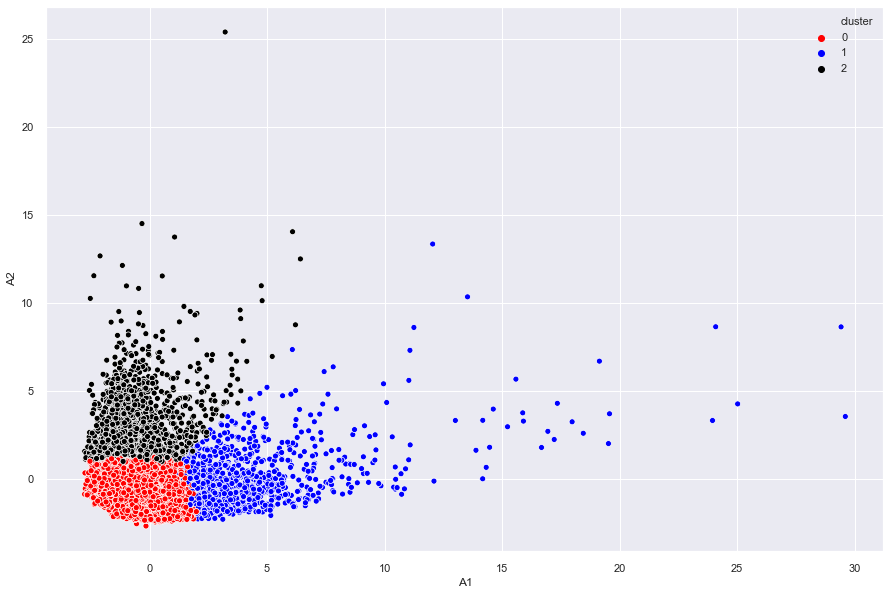

In [125]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=km_df,palette=['red','blue', 'black'])
plt.show()

### AGGLOMERATIVE PARAMETER TUNING

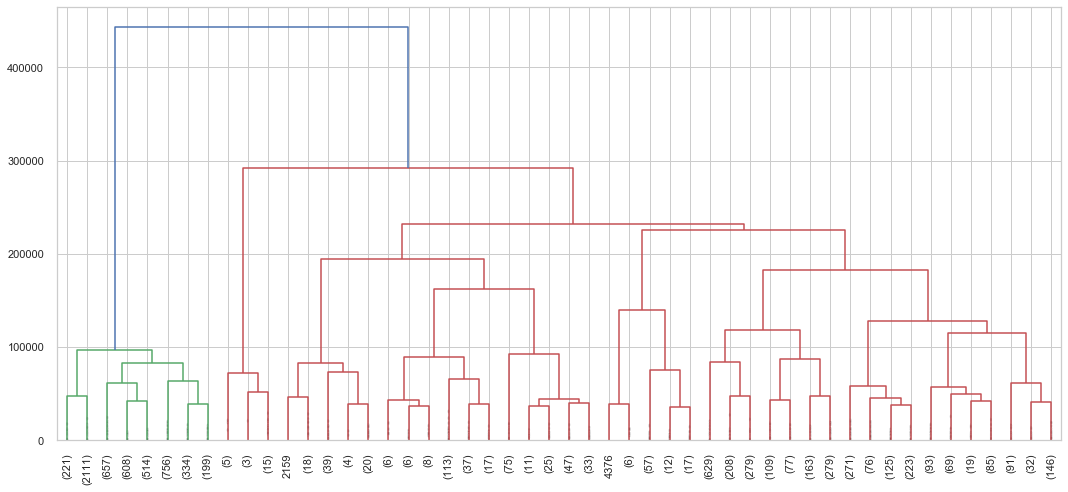

In [140]:
sns.set_style('whitegrid') 
D = df.values

Z = linkage(D, method='ward', metric='euclidean') 
 
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()

In [35]:
linkage_params = ['complete', 'average', 'single']
affinity_params= ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
agg_cluster_values = np.arange(2,15)
agg_params = list(product(linkage_params, affinity_params, agg_cluster_values))

In [36]:
agg_scores = []
for a in agg_params:
    agg_clustering = AgglomerativeClustering(linkage=a[0], affinity=a[1], n_clusters= a[2]).fit(df_scaled)
    agg_scores.append(silhouette_score(df_scaled, agg_clustering.labels_))
    print('score', silhouette_score(df_scaled, agg_clustering.labels_))
    print('linkage: ', a[0], ' affinity: ', a[1], ' n_clusters: ', a[2])
    print('--------------')

score 0.7865552204235159
linkage:  complete  affinity:  euclidean  n_clusters:  2
--------------
score 0.7863087686974487
linkage:  complete  affinity:  euclidean  n_clusters:  3
--------------
score 0.7792607193799916
linkage:  complete  affinity:  euclidean  n_clusters:  4
--------------
score 0.659926631523678
linkage:  complete  affinity:  euclidean  n_clusters:  5
--------------
score 0.6598151048856621
linkage:  complete  affinity:  euclidean  n_clusters:  6
--------------
score 0.6569970498997977
linkage:  complete  affinity:  euclidean  n_clusters:  7
--------------
score 0.6458267085553798
linkage:  complete  affinity:  euclidean  n_clusters:  8
--------------
score 0.3010829506599092
linkage:  complete  affinity:  euclidean  n_clusters:  9
--------------
score 0.30105539935870207
linkage:  complete  affinity:  euclidean  n_clusters:  10
--------------
score 0.30081099793197713
linkage:  complete  affinity:  euclidean  n_clusters:  11
--------------
score 0.30208827165384167
l

score 0.6620781942482523
linkage:  average  affinity:  l1  n_clusters:  11
--------------
score 0.6393955816360932
linkage:  average  affinity:  l1  n_clusters:  12
--------------
score 0.6374116560276811
linkage:  average  affinity:  l1  n_clusters:  13
--------------
score 0.6374826463731874
linkage:  average  affinity:  l1  n_clusters:  14
--------------
score 0.8408131376698187
linkage:  average  affinity:  l2  n_clusters:  2
--------------
score 0.8126023943418351
linkage:  average  affinity:  l2  n_clusters:  3
--------------
score 0.8080911614107097
linkage:  average  affinity:  l2  n_clusters:  4
--------------
score 0.7856992184182029
linkage:  average  affinity:  l2  n_clusters:  5
--------------
score 0.7565358993080963
linkage:  average  affinity:  l2  n_clusters:  6
--------------
score 0.756459972673568
linkage:  average  affinity:  l2  n_clusters:  7
--------------
score 0.7095966823252834
linkage:  average  affinity:  l2  n_clusters:  8
--------------
score 0.6991501261

score 0.7516640638535591
linkage:  single  affinity:  manhattan  n_clusters:  9
--------------
score 0.7514599890290744
linkage:  single  affinity:  manhattan  n_clusters:  10
--------------
score 0.7120925114180182
linkage:  single  affinity:  manhattan  n_clusters:  11
--------------
score 0.7120473114548196
linkage:  single  affinity:  manhattan  n_clusters:  12
--------------
score 0.6927816041200303
linkage:  single  affinity:  manhattan  n_clusters:  13
--------------
score 0.6928650199431099
linkage:  single  affinity:  manhattan  n_clusters:  14
--------------
score -0.24919078727405053
linkage:  single  affinity:  cosine  n_clusters:  2
--------------
score -0.32110776627932675
linkage:  single  affinity:  cosine  n_clusters:  3
--------------
score -0.34112958690014605
linkage:  single  affinity:  cosine  n_clusters:  4
--------------
score -0.3494948690220834
linkage:  single  affinity:  cosine  n_clusters:  5
--------------
score -0.35838837028637155
linkage:  single  affin

In [37]:
linkage_params = ['ward']
affinity_params= ['euclidean']
agg_cluster_values = np.arange(2,15)
agg_params = list(product(linkage_params, affinity_params, agg_cluster_values))

In [38]:
for a in agg_params:
    agg_clustering = AgglomerativeClustering(linkage=a[0], affinity=a[1], n_clusters= a[2]).fit(df_scaled)
    agg_scores.append(silhouette_score(df_scaled, agg_clustering.labels_))
    print('score', silhouette_score(df_scaled, agg_clustering.labels_))
    print('linkage: ', a[0], ' affinity: ', a[1], ' n_clusters: ', a[2])
    print('--------------')

score 0.1775448235536517
linkage:  ward  affinity:  euclidean  n_clusters:  2
--------------
score 0.1731098007232828
linkage:  ward  affinity:  euclidean  n_clusters:  3
--------------
score 0.1547093352037027
linkage:  ward  affinity:  euclidean  n_clusters:  4
--------------
score 0.15806867978666445
linkage:  ward  affinity:  euclidean  n_clusters:  5
--------------
score 0.17335577924064
linkage:  ward  affinity:  euclidean  n_clusters:  6
--------------
score 0.156415467090623
linkage:  ward  affinity:  euclidean  n_clusters:  7
--------------
score 0.15203451293262077
linkage:  ward  affinity:  euclidean  n_clusters:  8
--------------
score 0.15371895842035113
linkage:  ward  affinity:  euclidean  n_clusters:  9
--------------
score 0.1563363856595319
linkage:  ward  affinity:  euclidean  n_clusters:  10
--------------
score 0.158909569995112
linkage:  ward  affinity:  euclidean  n_clusters:  11
--------------
score 0.15622669945771975
linkage:  ward  affinity:  euclidean  n_clu

In [39]:
max(agg_scores)

0.8408131376698187

In [89]:
agg_best_params=  AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=2) .fit(df_scaled)
silhouette_score(df_scaled, agg_best_params.labels_)

0.8408131376698187

In [109]:
agg_score_best_params = silhouette_score(df_scaled, agg_best_params.labels_)

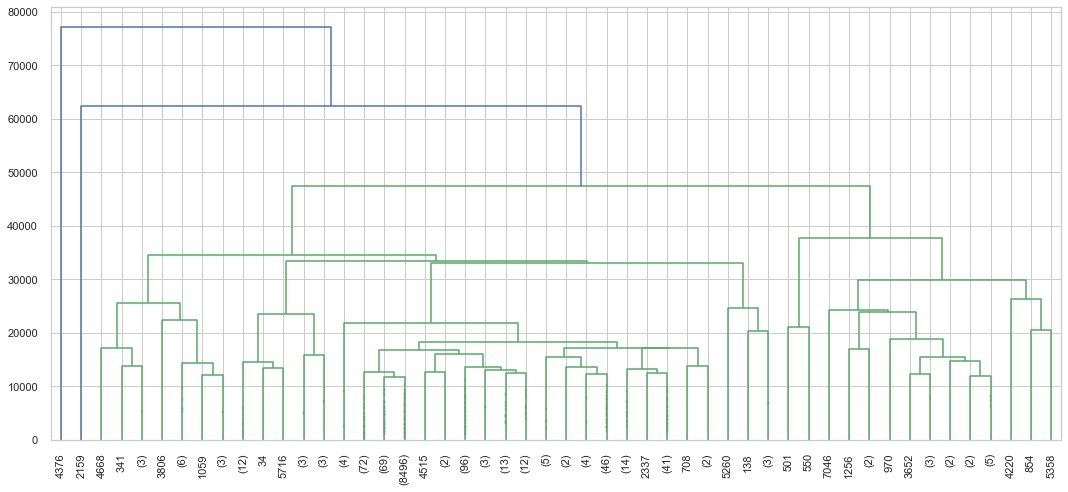

In [141]:
sns.set_style('whitegrid') 
D = df.values

Z = linkage(D, method='average', metric='euclidean') 
 
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()

In [110]:
agg_score_best_params

0.8408131376698187

In [90]:
print(Counter(agg_best_params.labels_).keys()) # equals to list(set(words))
print(Counter(agg_best_params.labels_).values())

dict_keys([0, 1])
dict_values([8949, 1])


In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage,median 

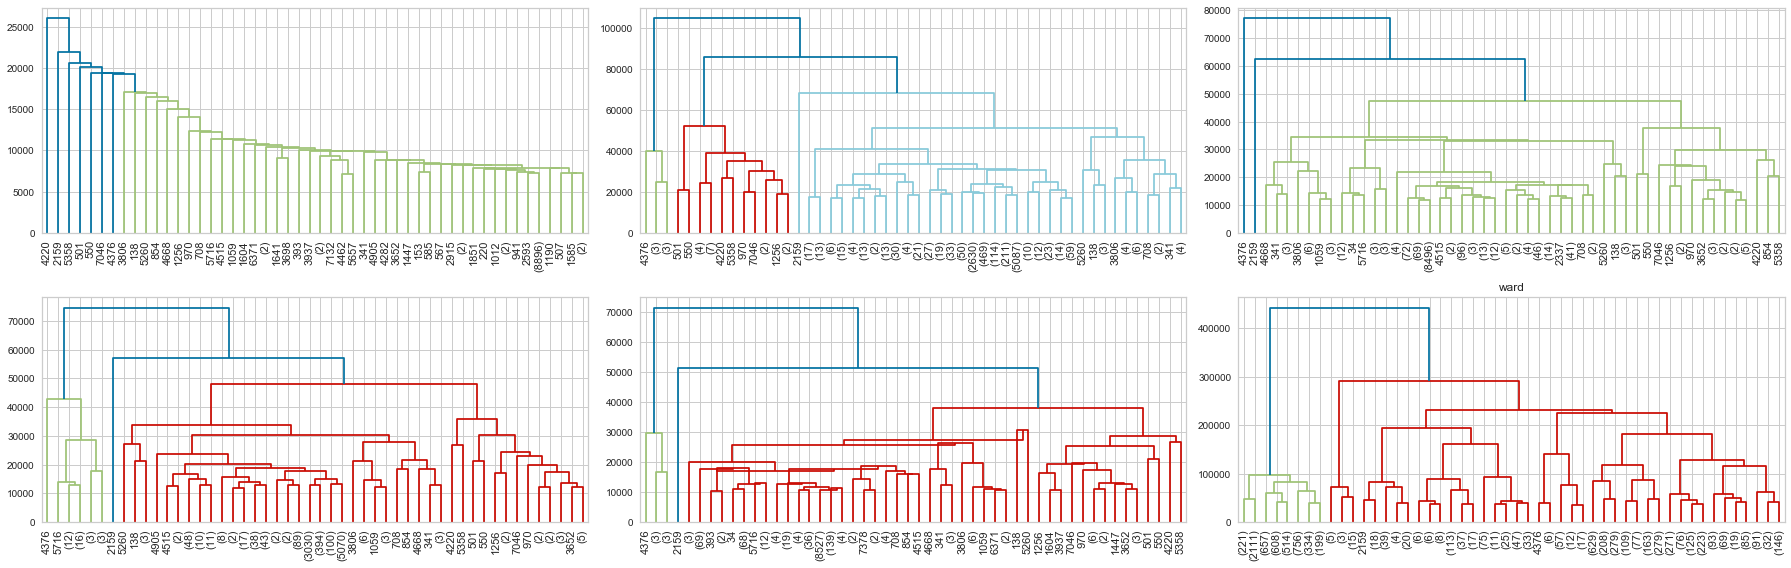

In [75]:
D = df.values

#ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
methods = ['single','complete','average','weighted','median','ward']


plt.figure(figsize=(25, 8))
for i in range(len(methods)):
    plt.subplot(231+i)
    Z = linkage(D, method=methods[i]) #Perform hierarchical/agglomerative clustering. 
    de = dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=11.,
        distance_sort='descending',
        truncate_mode = 'lastp',
         p=50
      
  )
plt.title(methods[i])

plt.tight_layout()

### DBSCAN PARAMETER TUNING

In [142]:
db_default_params= DBSCAN().fit(df_scaled)
silhouette_score(df_scaled, db_default_params.labels_)

-0.4437013266683457

In [143]:
db_default_df = pd.concat([df_pca, pd.DataFrame({'cluster':db_default_params.labels_})], axis = 1)
db_default_df.head()

,A1,A2,cluster
0,-1.682220,-1.076456,0
1,-1.138289,2.506438,-1
2,0.969684,-0.383520,-1
3,-0.873634,0.043189,-1
4,-1.599431,-0.688592,0


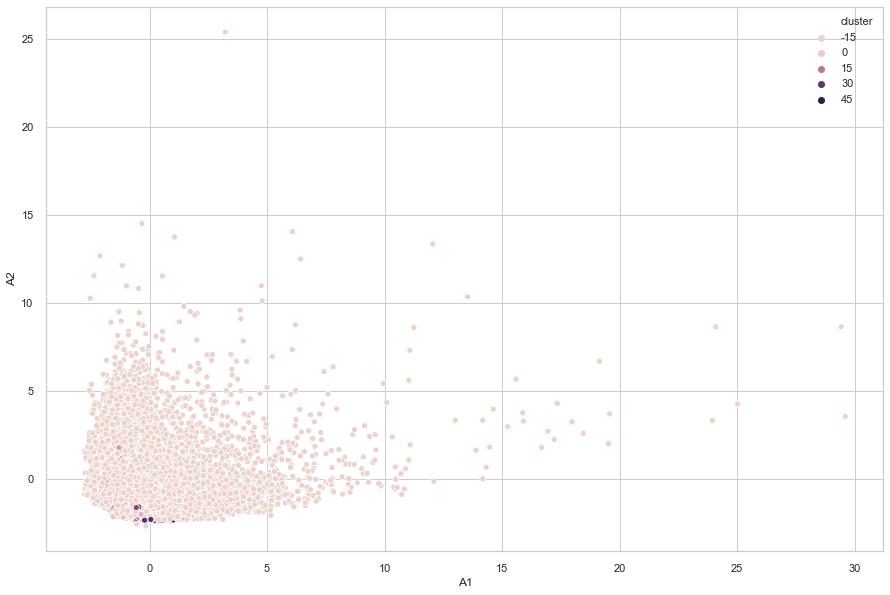

In [147]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=db_default_df)
plt.show()

In [91]:
eps_params = [0.5,1,2,3,4,5,6,7,8,9,10,11]
minsamples_params= [0.5,1,2,3,4,5,6,7,8,9,10,11]
db_params = list(product(eps_params, minsamples_params))

In [92]:
db_scores = []
for d in db_params:
    db_clustering = DBSCAN(eps=d[0], min_samples=d[1]).fit(df_scaled)
    db_scores.append(silhouette_score(df_scaled, db_clustering.labels_))
    print('score', silhouette_score(df_scaled, db_clustering.labels_))
    print('eps: ', d[0], ' minsamples: ', d[1])
    print('--------------')

score -0.14501241385518449
eps:  0.5  minsamples:  0.5
--------------
score -0.14501241385518449
eps:  0.5  minsamples:  1
--------------
score -0.5184386915182655
eps:  0.5  minsamples:  2
--------------
score -0.523382337106694
eps:  0.5  minsamples:  3
--------------
score -0.5132833902160969
eps:  0.5  minsamples:  4
--------------
score -0.4437013266683457
eps:  0.5  minsamples:  5
--------------
score -0.4071232900597777
eps:  0.5  minsamples:  6
--------------
score -0.3879334768202325
eps:  0.5  minsamples:  7
--------------
score -0.32516542777386204
eps:  0.5  minsamples:  8
--------------
score -0.31765746320613075
eps:  0.5  minsamples:  9
--------------
score -0.2936149298740165
eps:  0.5  minsamples:  10
--------------
score -0.17525953035967712
eps:  0.5  minsamples:  11
--------------
score -0.3874708046243457
eps:  1  minsamples:  0.5
--------------
score -0.3874708046243457
eps:  1  minsamples:  1
--------------
score -0.4606705658637382
eps:  1  minsamples:  2
------

score 0.8319815637007304
eps:  10  minsamples:  7
--------------
score 0.8319815637007304
eps:  10  minsamples:  8
--------------
score 0.8319815637007304
eps:  10  minsamples:  9
--------------
score 0.8319815637007304
eps:  10  minsamples:  10
--------------
score 0.8326153738046009
eps:  10  minsamples:  11
--------------
score 0.7701179464305935
eps:  11  minsamples:  0.5
--------------
score 0.7701179464305935
eps:  11  minsamples:  1
--------------
score 0.8294005310977022
eps:  11  minsamples:  2
--------------
score 0.8294005310977022
eps:  11  minsamples:  3
--------------
score 0.8294005310977022
eps:  11  minsamples:  4
--------------
score 0.8294005310977022
eps:  11  minsamples:  5
--------------
score 0.8294005310977022
eps:  11  minsamples:  6
--------------
score 0.8355873223717275
eps:  11  minsamples:  7
--------------
score 0.8355873223717275
eps:  11  minsamples:  8
--------------
score 0.8355873223717275
eps:  11  minsamples:  9
--------------
score 0.8355873223717

In [93]:
max(db_scores)

0.8355873223717275

In [94]:
db_best_params= DBSCAN(eps=10, min_samples=4).fit(df_scaled)
silhouette_score(df_scaled, db_best_params.labels_)

0.8355873223717275

In [111]:
db_score_best_params = silhouette_score(df_scaled, db_best_params.labels_)

In [95]:
print(Counter(db_best_params.labels_).keys()) # equals to list(set(words))
print(Counter(db_best_params.labels_).values())

dict_keys([0, -1])
dict_values([8941, 9])


In [127]:
db_df = pd.concat([df_pca, pd.DataFrame({'cluster':db_best_params.labels_})], axis = 1)
db_df.head()

,A1,A2,cluster
0,-1.682221,-1.076455,0
1,-1.138296,2.506432,0
2,0.969688,-0.383500,0
3,-0.873631,0.043135,0
4,-1.599433,-0.688570,0


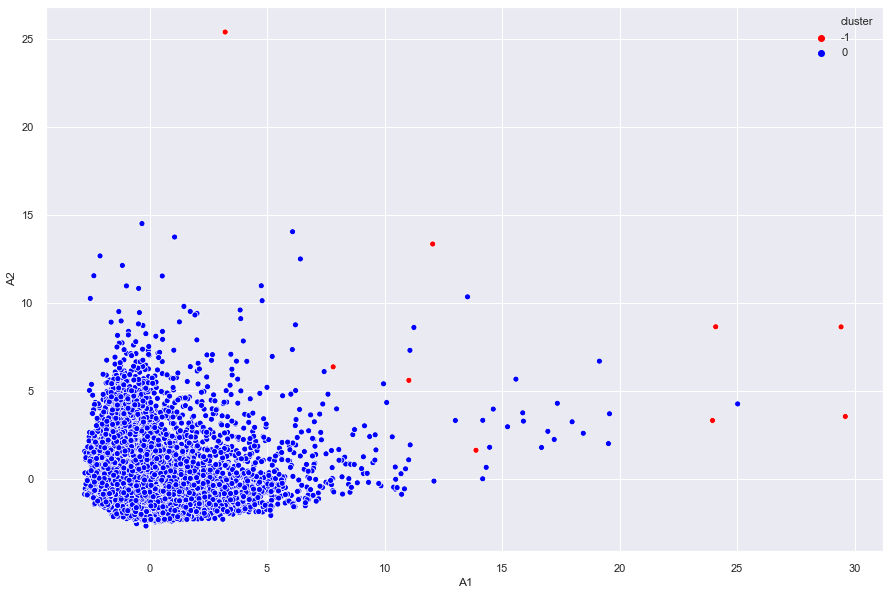

In [128]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=db_df,palette=['red','blue'])
plt.show()

In [117]:
Clustering_Silhouette_Scores_Best_Params  = [ ['KMeans',km_score_best_params ],
                                ['Agglomerative',agg_score_best_params ],
                                ['DBSCAN', db_score_best_params]]

Clustering_Silhouette_Scores_Best_Params  = pd.DataFrame(Clustering_Silhouette_Scores_Best_Params,
                                                         columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores_Best_Params.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Agglomerative,0.840813
2,DBSCAN,0.835587
0,KMeans,0.251787


In [118]:
pd.concat([Clustering_Silhouette_Scores, Clustering_Silhouette_Scores_Best_Params], axis=1)

,Clustering Method,Silhouette Score,Clustering Method,Silhouette Score
0,KMeans,0.218552,KMeans,0.251787
1,Agglomerative,0.177545,Agglomerative,0.840813
2,DBSCAN,-0.443701,DBSCAN,0.835587


# Step5: Further Performance Improvement (Your best clustering algorithm) – 20p
### a)	Remove outliers (if there are any) in your data. Check if this improved your algorithm’s performance. Show before and after performance of your clustering method (both visually and numerically)


In [148]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [149]:
new_df_scaled = StandardScaler().fit_transform(new_df)
new_df_nor = normalize(new_df_scaled) 

In [150]:
new_df.shape

(7434, 17)

In [180]:
pca_wo = PCA(n_components=2).fit(new_df_scaled)

df_pca2_wo = pca_wo.fit_transform(new_df_scaled)
print("original shape:   ", new_df_scaled.shape)
print("transformed shape:", df_pca2_wo.shape)

original shape:    (7434, 17)
transformed shape: (7434, 2)


In [181]:
df_pca_wo = pd.DataFrame(df_pca2_wo) 
df_pca_wo.columns = ['A1', 'A2']
df_pca_wo.head()

,A1,A2
0,-1.325626,-2.046630
1,-2.781080,3.311223
2,1.237431,0.544783
3,-0.606672,-0.007226
4,-1.448066,-1.469061


In [167]:
km_wo_scores = []
for k in kmeans_params:
    km_wo_clustering = KMeans(init=k[0], algorithm=k[1], n_clusters= k[2], random_state = 42).fit(new_df_scaled)
    km_wo_scores.append(silhouette_score(new_df_scaled, km_wo_clustering.labels_))
    print('score', silhouette_score(new_df_scaled, km_wo_clustering.labels_))
    print('init: ', k[0], ' algorithm: ', k[1], ' cluster: ', k[2])
    print('--------------')

score 0.20556718055179538
init:  random  algorithm:  auto  cluster:  2
--------------
score 0.20696304758722564
init:  random  algorithm:  auto  cluster:  3
--------------
score 0.1839262545502087
init:  random  algorithm:  auto  cluster:  4
--------------
score 0.18390225786455824
init:  random  algorithm:  auto  cluster:  5
--------------
score 0.19060481544230792
init:  random  algorithm:  auto  cluster:  6
--------------
score 0.1987139590981436
init:  random  algorithm:  auto  cluster:  7
--------------
score 0.19953603838374045
init:  random  algorithm:  auto  cluster:  8
--------------
score 0.20206646883322749
init:  random  algorithm:  auto  cluster:  9
--------------
score 0.18144235622327992
init:  random  algorithm:  auto  cluster:  10
--------------
score 0.18154995435964905
init:  random  algorithm:  auto  cluster:  11
--------------
score 0.18077513249840663
init:  random  algorithm:  auto  cluster:  12
--------------
score 0.18790327926434847
init:  random  algorithm:  

In [168]:
max(km_wo_scores)

0.20696304758722564

In [170]:
km_wo_best_params= KMeans(init="random", algorithm="auto", n_clusters= 3, random_state = 42).fit(new_df_scaled)
silhouette_score(new_df_scaled, km_wo_best_params.labels_)

0.20696304758722564

In [182]:
km_wo_df = pd.concat([df_pca_wo, pd.DataFrame({'cluster':km_wo_best_params.labels_})], axis = 1)
km_wo_df.head()

,A1,A2,cluster
0,-1.325626,-2.046630,0
1,-2.781080,3.311223,1
2,1.237431,0.544783,2
3,-0.606672,-0.007226,0
4,-1.448066,-1.469061,0


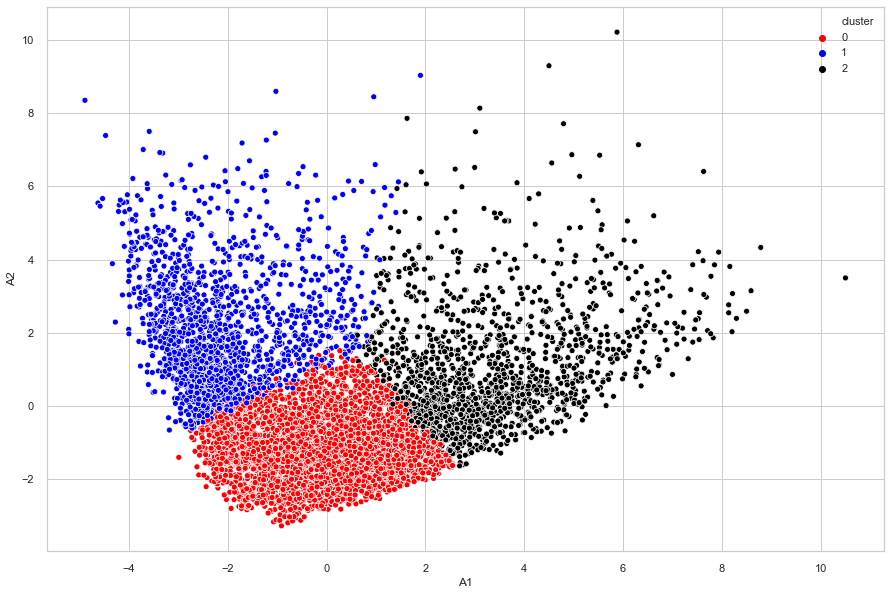

In [183]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=km_wo_df,palette=['red','blue','black'])
plt.show()

In [179]:
db_wo_best_params= DBSCAN(eps=5, min_samples=10).fit(new_df_scaled)
silhouette_score(new_df_scaled, db_wo_best_params.labels_)

0.5413336018559824

In [184]:
db_df_wo = pd.concat([df_pca_wo, pd.DataFrame({'cluster':db_wo_best_params.labels_})], axis = 1)
db_df_wo.head()

,A1,A2,cluster
0,-1.325626,-2.046630,0
1,-2.781080,3.311223,0
2,1.237431,0.544783,0
3,-0.606672,-0.007226,0
4,-1.448066,-1.469061,0


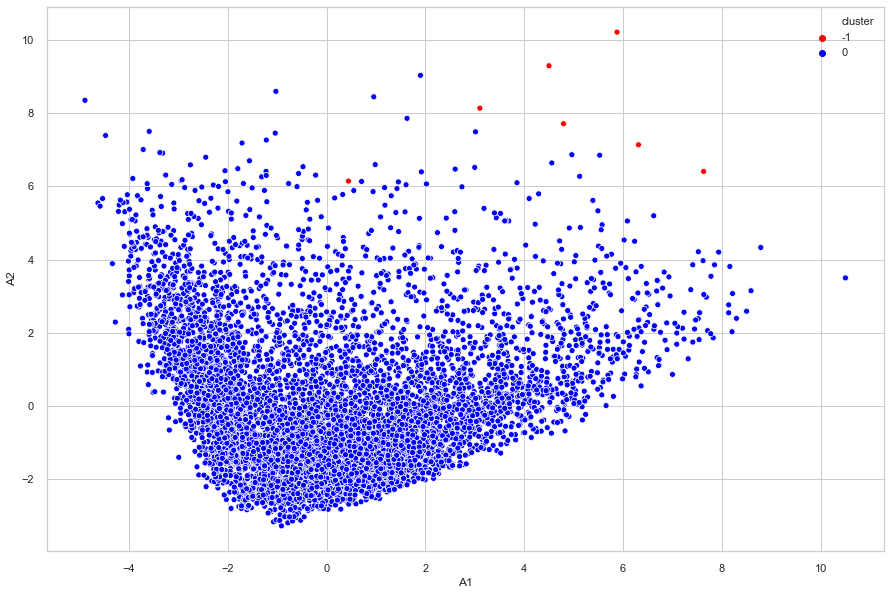

In [186]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=db_df_wo,palette=['red','blue'])
plt.show()

### b)	Apply a feature selection method. Check if this improved your algorithm’s performance. Show before and after performance of your clustering method (both visually and numerically)

In [245]:
cor_train = df.select_dtypes(include=[np.number])
top_features = corrDf.index[abs(corrDf['PAYMENTS']>0.5)]
top_corr = df[top_features].corr()
top_corr.corr().iplot(kind='heatmap',colorscale="Blues", title="Feature Correlation Matrix")

In [246]:
top_features

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'PAYMENTS'], dtype='object')

In [277]:
df_with_features = df[['PURCHASES', 'ONEOFF_PURCHASES', 'PAYMENTS']]

In [278]:
scaled_fs_df = StandardScaler().fit_transform(df_with_features)

In [279]:
pca_fs = PCA(n_components=2).fit(scaled_fs_df)

df_pca_fs = pca_fs.fit_transform(scaled_fs_df)
print("original shape:   ", scaled_fs_df.shape)
print("transformed shape:", df_pca_fs.shape)

original shape:    (8950, 3)
transformed shape: (8950, 2)


In [280]:
df_pca_fs = pd.DataFrame(df_pca_fs) 
df_pca_fs.columns = ['A1', 'A2']
df_pca_fs.head()

,A1,A2
0,-0.745118,-0.177023
1,-0.088255,0.996677
2,-0.194981,-0.338393
3,0.168870,-0.805505
4,-0.678489,-0.027226


In [281]:
km_fs= KMeans(init="random", algorithm="auto", n_clusters= 3, random_state = 42).fit(scaled_fs_df)
silhouette_score(scaled_fs_df, km_fs.labels_)

0.7442309443166978

In [282]:
km_fsDf = pd.concat([df_pca_fs, pd.DataFrame({'cluster':km_fs.labels_})], axis = 1)
km_fsDf.head()

,A1,A2,cluster
0,-0.745118,-0.177023,0
1,-0.088255,0.996677,0
2,-0.194981,-0.338393,0
3,0.168870,-0.805505,0
4,-0.678489,-0.027226,0


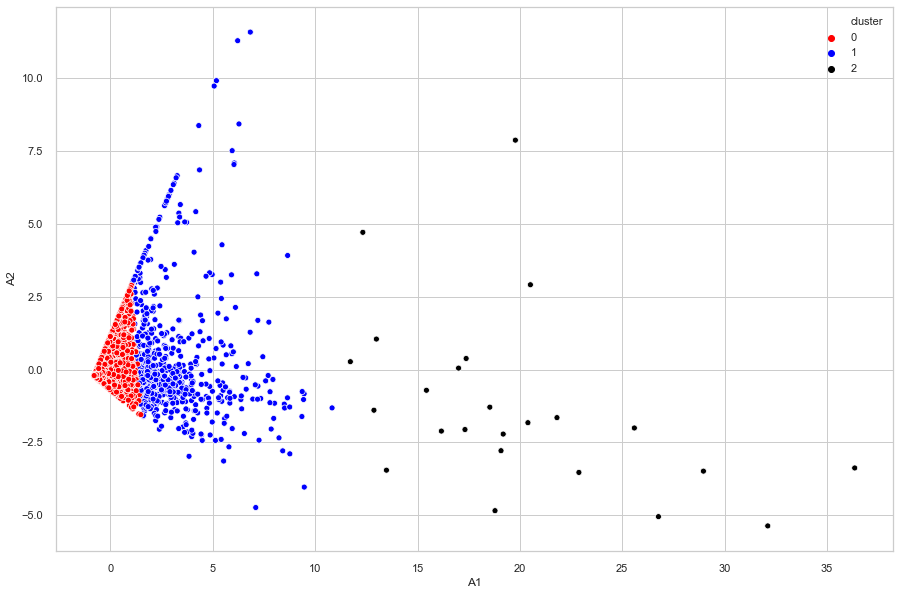

In [283]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="A1", y="A2", hue="cluster", data=km_fsDf ,palette=['red','blue', 'black'])
plt.show()

In [284]:
df2 = df.copy()

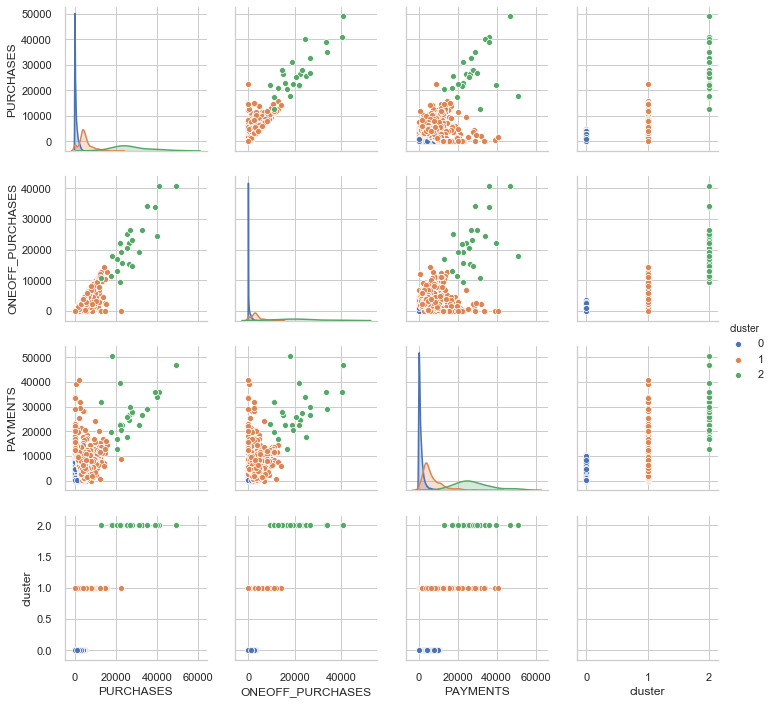

In [286]:
best_cols = ['PURCHASES', 'ONEOFF_PURCHASES', 'PAYMENTS']
kmeans = KMeans(init="random", algorithm="auto", n_clusters= 3, random_state = 42)
best_vals = df2[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( scaled_fs_df )

df2["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( df2[ best_cols ], hue="cluster")

In [195]:
df3 = df.copy()

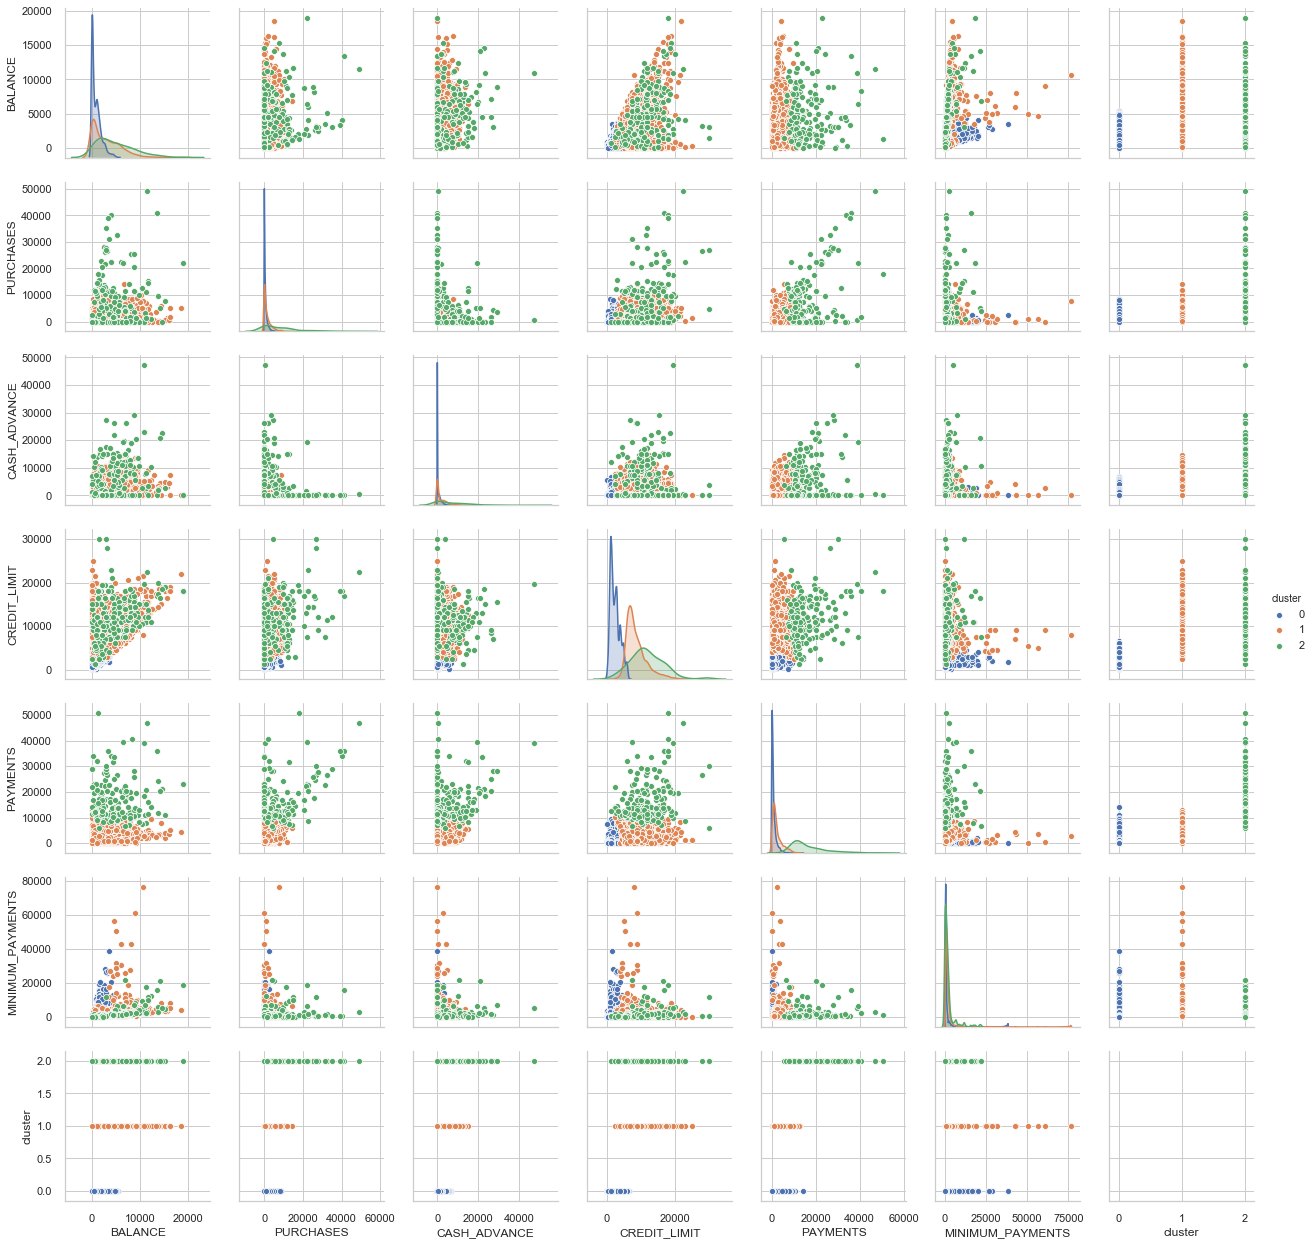

In [196]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans2 = KMeans(init="random", algorithm="auto", n_clusters= 3, random_state = 42)
best_vals = df3[best_cols].iloc[ :, 1:].values
y_pred = kmeans2.fit_predict( best_vals )

df3["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( df3[ best_cols ], hue="cluster")

#### Küme 0: Ödeme tutarları ve kredi kartı limitleri en düşük olan kümedir. Minimum harcamaları yüksektir. Ödeme tutarları düşüktür. Daha düşük gelirli veya yeni müşteri olabilirler.

#### Küme 1:  Ödemeleri ve kredi kartı limitleri sıfırıncı kümeden fazla ikinci kümeden azdır.  Çok fazla harcamadan kaçınırlar.

#### Küme 2: Çok satın alıp çok öderler. Kredi kartı limitleri yüksektir. Minimum harcamaları düşük ve kalan bakiyeleri yüksektir.